In [1]:
import glob, os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [2]:
path = '../Results/Detection_fishcall/manual_csv_0.75'

In [3]:
alldf = pd.DataFrame()

for csvpath in glob.glob(f'{path}/202306/*_stats.csv'):
    print(csvpath)
    df = pd.read_csv(csvpath)
    df = df[df['keep']==True]
    alldf = pd.concat([alldf, df])

../Results/Detection_fishcall/manual_csv_0.75/202306/result_230618_stats.csv
../Results/Detection_fishcall/manual_csv_0.75/202306/result_230620_stats.csv
../Results/Detection_fishcall/manual_csv_0.75/202306/result_230619_stats.csv
../Results/Detection_fishcall/manual_csv_0.75/202306/result_230621_stats.csv
../Results/Detection_fishcall/manual_csv_0.75/202306/result_230622_stats.csv
../Results/Detection_fishcall/manual_csv_0.75/202306/result_230623_stats.csv


Text(6.600000000000005, 84.0, '2.78±1.35 kHz')

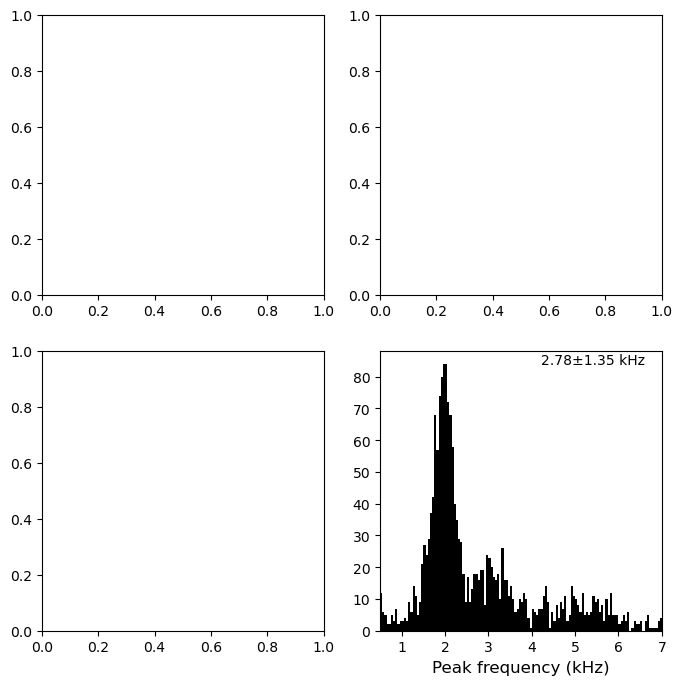

In [93]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

bins = np.arange(0.5, 7.1, 0.05)
tmp= ax[1,1].hist(alldf['Peak_f']/1000, bins=bins, color='k')
cnt=tmp[0]; interval=tmp[-1]
ax[1,1].set_xlim(0.5,7)
ax[1,1].set_xlabel('Peak frequency (kHz)', fontsize=12)
ax[1,1].set_xticks(np.arange(1,7+1,1))
avg = round(np.mean(alldf['Peak_f']/1000),2)
std = round(np.std(alldf['Peak_f']/1000),2)
ax[1,1].text(x=bins[-10], y = max(cnt), s = f'{avg}±{std} kHz', ha='right')

In [94]:
bins

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
       1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55,
       1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ,
       2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65,
       2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 ,
       3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75,
       3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 ,
       4.35, 4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85,
       4.9 , 4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 ,
       5.45, 5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95,
       6.  , 6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 ,
       6.55, 6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05])

In [95]:
n = len(bins)-1
interval = list(tmp[1])
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(interval[ii+1]+interval[ii])/2
    
y_hist=cnt

/var/folders/07/_m900g1931d1pc5dgv3v4qpw0000gn/T/ipykernel_41173/2506557181.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


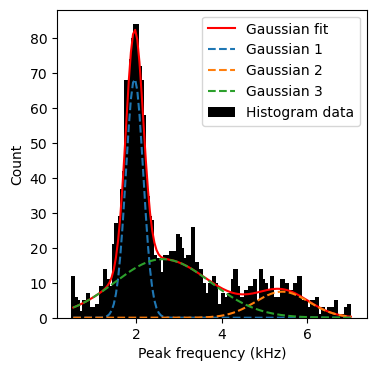

Gaussian 1: Amplitude = 68.40262782261922, Mean = 1.960582499087288, Stddev = 0.20302067318468753
Gaussian 2: Amplitude = 7.454361555259996, Mean = 5.416623451325339, Stddev = 0.6289867113068861
Gaussian 3: Amplitude = 16.767014918678818, Mean = 2.6201395854795035, Stddev = 1.120993547165015


In [101]:
def gaussian(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

def multi_gaussian(x, *params):
    n_gaussians = len(params) // 3
    result = np.zeros_like(x)
    for i in range(n_gaussians):
        amp = params[i * 3]
        mean = params[i * 3+ 1]
        stddev = params[i * 3 + 2]
        result += gaussian(x, amp, mean, stddev)
    return result

# 初始猜测参数（你可以调整这些参数以获得更好的拟合）
initial_guess = [160, 1.5, 0.5, 40, 2, 1.5, 50, 4, 1]

# 拟合数据
params, covariance = curve_fit(multi_gaussian, x_hist, y_hist, p0=initial_guess)
# 计算拟合值
fitted_values = multi_gaussian(x_hist, *params)
# 计算每个高斯分布的值
gaussians = []
n_gaussians = len(params) // 3
for i in range(n_gaussians):
    amp = params[i * 3]
    mean = params[i * 3 + 1]
    stddev = params[i * 3 + 2]
    gaussians.append(gaussian(x_hist, amp, mean, stddev))
    
# 将数据分类
classified_data = np.zeros_like(y_hist)
for i in range(len(x_hist)):
    probs = [gaussian(x_hist[i], params[j * 3], params[j * 3 + 1], params[j * 3 + 2]) for j in range(n_gaussians)]
    classified_data[i] = np.argmax(probs) + 1  # 类别从1开始
# 绘制结果
plt.figure(figsize=(4,4))
plt.bar(x_hist, y_hist, width=0.1, label='Histogram data',color='k')
plt.plot(x_hist, fitted_values, color='red', label='Gaussian fit')

# 标记每个高斯分布的峰值
for i in range(n_gaussians):
    plt.plot(x_hist, gaussians[i], linestyle='--', label=f'Gaussian {i+1}')
    # plt.axvline(params[i * 3 + 1], color='green', linestyle='--')
    # plt.text(params[i * 3 + 1], max(gaussians[i]), f'Peak {i+1}\n({params[i * 3 + 1]:.2f}, {max(gaussians[i]):.2f})', 
             # horizontalalignment='center', verticalalignment='bottom')

plt.xlabel('Peak frequency (kHz)')
plt.ylabel('Count')
plt.legend()
plt.show()

# 打印每个高斯分布的峰值
for i in range(n_gaussians):
    amp = params[i * 3]
    mean = params[i * 3 + 1]
    stddev = params[i * 3 + 2]
    print(f'Gaussian {i+1}: Amplitude = {amp}, Mean = {mean}, Stddev = {stddev}')